In [2]:
import re
import os
import sys
import glob
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt
from fractions import Fraction
import pandas_helpers
import logging
from logging.config import dictConfig
import config
#import nba_py

In [3]:
os.makedirs(config.LOG_DIR, exist_ok=True)
dictConfig(config.LOGGING_CONFIG_DICT)

In [4]:
logging.info("reading attendance data")
attendance = pd.read_excel("../data/raw/nba_team_annual_attendance.xlsx")\
    .clean_column_names()\
    .parse_date_columns()\
    .deduplicate(["team", "starting_year"])


reading attendance data
clean_column_names
parse_date_columns
deduplicate


In [6]:
logging.info("reading player value data")
bestLineups = pd.read_csv('../data/raw/nba_player_value/data/bestLineups.csv')\
                .clean_column_names()\
                .parse_date_columns()


reading player value data
clean_column_names
parse_date_columns


In [7]:
lineups_16_17 = pd.read_csv('../data/raw/nba_player_value/data/lineups_16_17.csv')\
                  .clean_column_names()\
                  .parse_date_columns()


clean_column_names
parse_date_columns


In [8]:
nba_positions = pd.read_csv('../data/raw/nba_player_value/data/nba_positions.csv')\
                  .clean_column_names()\
                  .parse_date_columns()


clean_column_names
parse_date_columns


In [9]:
nba_stats = pd.read_csv('../data/raw/nba_player_value/data/nbaStats.csv')\
    .clean_column_names()\
    .parse_date_columns()


clean_column_names
parse_date_columns


In [10]:
ncaa_positions = pd.read_csv('../data/raw/nba_player_value/data/ncaa_positions.csv')\
    .clean_column_names()\
    .parse_date_columns()


clean_column_names
parse_date_columns


In [11]:
predictions = pd.read_csv('../data/raw/nba_player_value/data/predictions.csv')\
    .clean_column_names()\
    .parse_date_columns()

logging.info("done reading player value data")

clean_column_names
parse_date_columns
done reading player value data


In [12]:
odds = (
    pd.concat(map(pd.read_excel, glob.glob("../data/raw/odds/*.xlsx")))
    .clean_column_names()
    .deduplicate(["team", "date"])
)

clean_column_names
deduplicate


In [5]:
elo = pd.concat(map(pd.read_csv, glob.glob("../data/raw/nba_elo/nbaallelo.csv")))\
    .clean_column_names()\
    .parse_date_columns()\
    .deduplicate(['team_id','opp_id','date_game'])

clean_column_names
parse_date_columns
deduplicate


In [6]:
elo

gameorder       game_id lg_id  iscopy  year_id  \
team_id opp_id date_game                                                    
ANA     DLC    1967-10-16       7588  196710160DLC   ABA       1     1968   
               1967-11-15       7740  196711150DLC   ABA       1     1968   
               1967-11-26       7807  196711260DLC   ABA       1     1968   
               1967-12-08       7874  196712080DLC   ABA       1     1968   
               1968-01-14       8086  196801140ANA   ABA       0     1968   
               1968-01-28       8167  196801280ANA   ABA       0     1968   
               1968-02-17       8301  196802170DLC   ABA       1     1968   
               1968-02-27       8357  196802270ANA   ABA       0     1968   
               1968-03-03       8384  196803030ANA   ABA       0     1968   
               1968-03-10       8432  196803100ANA   ABA       0     1968   
        DNR    1967-10-15       7587  196710150DNR   ABA       1     1968   
               1967-11-06       7685  196711060DNR   ABA       1     1968   
               1967-12-03       7843  196712030DNR   ABA       1     1968   
               1967-12-09       7881  196712090DNR   ABA       1     1968   
               1967-12-14       7905  196712140ANA   ABA       0     1968   
               1967-12-22       7957  196712220ANA   ABA       0     1968   
               1968-01-19       8116  196801190ANA   ABA       0     1968   
               1968-01-21       8130  196801210ANA   ABA       0     1968   
               1968-01-31       8185  196801310ANA   ABA       0     1968   
               1968-02-15       8286  196802150DNR   ABA       1     1968   
        HSM    1967-11-08       7698  196711080ANA   ABA       0     1968   
               1967-11-14       7733  196711140HSM   ABA       1     1968   
               1967-12-06       7862  196712060HSM   ABA       1     1968   
               1967-12-28       7986  196712280HSM   ABA       1     1968   
               1968-01-10       8064  196801100HSM   ABA       1     1968   
               1968-01-24       8138  196801240ANA   ABA       0     1968   
               1968-02-04       8213  196802040ANA   ABA       0     1968   
               1968-02-12       8264  196802120ANA   ABA       0     1968   
               1968-02-25       8347  196802250ANA   ABA       0     1968   
        INA    1967-10-18       7597  196710180INA   ABA       1     1968   
...                              ...           ...   ...     ...      ...   
WSC     STB    1948-01-21        452  194801210WSC   NBA       0     1948   
               1948-02-28        512  194802280STB   NBA       1     1948   
               1948-03-13        531  194803130WSC   NBA       0     1948   
               1948-12-10        663  194812100STB   NBA       1     1949   
               1948-12-11        665  194812110WSC   NBA       0     1949   
               1948-12-30        711  194812300STB   NBA       1     1949   
               1949-02-03        806  194902030STB   NBA       1     1949   
               1949-03-02        875  194903020WSC   NBA       0     1949   
               1949-11-05        965  194911050WSC   NBA       0     1950   
               1949-12-14       1119  194912140WSC   NBA       0     1950   
               1949-12-25       1161  194912250STB   NBA       1     1950   
               1950-01-24       1285  195001240STB   NBA       1     1950   
               1950-01-26       1293  195001260STB   NBA       1     1950   
               1950-03-11       1475  195003110WSC   NBA       0     1950   
        SYR    1949-12-28       1176  194912280WSC   NBA       0     1950   
               1950-01-01       1194  195001010SYR   NBA       1     1950   
               1950-11-25       1606  195011250WSC   NBA       0     1951   
               1950-11-26       1610  195011260SYR   NBA       1     1951   
        TRH    1946-11-23         46  194611230WSC   NBA       0     1947   
               1946-11-

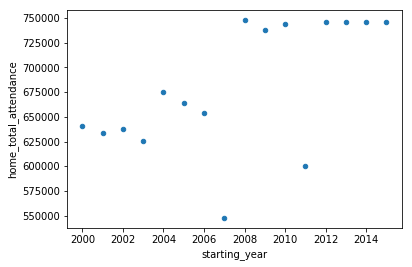

In [51]:
attendance[attendance['team']=='Thunder'].plot.scatter(x='starting_year',y='home_total_attendance')

In [40]:
elo['year'] = elo['date_game'].apply(lambda x: x.year)

In [44]:
#elo.reset_index()
elo_annual = elo.deduplicate(['team_id','year'],numeric_column='mean')

deduplicate


In [ ]:
attendance

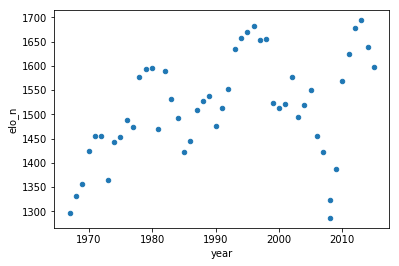

In [50]:
elo_annual[elo_annual['fran_id']=='Thunder'].plot.scatter(x='year',y='elo_n')

In [52]:
thunder_elo = elo_annual[elo_annual['fran_id']=='Thunder']

In [53]:
thunder_elo.to_csv('okc_elo.csv')

In [39]:
combined = (
    header_summary.join(productionsummary_summary, rsuffix="prodsum")
    .join(perf_summary, rsuffix="perf")
    .join(fracstage_summary, rsuffix="frac")
    .merge_multi(test_summary, suffixes=("", "test"))
    .merge_multi(completion_summary, suffixes=("", "comp"))
    .merge_multi(production_summary, suffixes=("", "prod"))
)

In [40]:
combined["days_since_completion"] = (
    combined["first_producing_day_of_month"] - combined["completiondate"]
) / np.timedelta64(1, "D")


In [41]:
combined["increment_30days"] = combined["days_since_completion"].apply(
    lambda x: np.floor(x / 30) + 1
)


In [42]:
combined = combined[
    combined["first_producing_day_of_month"] >= combined["completiondate"]
]
combined.shape


(1089884, 287)

In [43]:
combined_subset = combined[combined["increment_30days"].map(
    lambda x: 0 <= x <= 12)]
combined_subset.shape


(107540, 287)

In [44]:
combined_subset = combined_subset.deduplicate(
    key=["api", "increment_30days"]
).deduplicate(key=["api"], override={"oil": "sum"})

combined_subset.shape


(1997, 287)

In [45]:
combined_subset.to_csv("./data/welldb_combined.csv")
